<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Problema desafío



Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

In [2]:
fp = 500
fs = 1500
alpha_max = 1
alpha_min = 18

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.

In [3]:
import math as m

N_w1 = 2*m.pi*fp  # Norma de frecuencia
# y usando la norma:
wp = 1
ws = fs/fp

# conociendo la transferencia de un filtro de maxima plnicidad:
epsilon_cuad = pow(10, 0.1*alpha_max) - 1   # despejo epsilon cuadrado
N = m.log( (pow(10, alpha_min/10) - 1) / epsilon_cuad ) / (2 * m.log(ws))   # despejo n

# analizo lo obtenido
if ( N > 2 ):
    print("Si se puede realizar con una sola sección de segundo orden")
else:
    print("No se puede realizar con una sola sección de segundo orden")

Si se puede realizar con una sola sección de segundo orden


b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:
 
   * la función transferencia normalizada
   * las respuestas de módulo, fase y la localización de polos y ceros


In [ ]:
import scipy.signal as signal

# aunque podria usar estas dos funciones:
# z,p,k = signal.cheb1ap(N, alpha_max)
# tf_n, tf_d = signal.zpk2tf(z,p,k)

# hice el procedimiento que haria en papel:

# obtengo el N (aunque supongo que iba a ser 2)
N = m.acosh(m.sqrt((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1))) / m.acosh(ws)
N = m.ceil(N)

# arrays para lo prox
sigma = [0] * N
omega = [0] * N

# uso el metodo de shauman para sacar los polos
a = m.asinh( 1/epsilon ) / N
for k in list(range(1, N+1)):
    sigma[k-1] = -m.sinh(a) * m.sin(m.pi*(2*k-1)/(2*N))
    omega[k-1] = m.cosh(a) * m.cos(m.pi*(2*k-1)/(2*N))
# y saco la ganancia que hace de numerador
num = 1 / (pow(2,N-1) * epsilon)

# para no complicarla y sabiendo que el N=2, formo el denominador
# (aunque bueno esto ya deja de servir para N!=2)
den = [1, -2*sigma[0], sigma[0]**2+omega[0]**2]    


# armo lo que se va a ver en MarkDown
# from IPython.display import Markdown as md
# md("$f_r = %i$ GHz"%(fr))

# str = r'T(s) = \frac{num}{s^2 · den_0 + s · den_1 + den_2}'
# str = str.replace('den_0',den(0)).replace('den_1',den(1)).replace('den_2',den(2)).replace('num',num)

# str2 = 'hola que tal'
# str2 = str2.replace('que',str(num))
# from IPython.display import display, Math, Latex
# str = r'T(s) = \frac{num}{s^2 · den_0 + s · den_1 + den_2}'

# str = str.replace('den_0',den(0)).replace('den_1',den(1)).replace('den_2',den(2)).replace('num',num)

# display(Math(str))

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede simular la función transferencia normalizada con el siguiente script. Solo hace falta que cambies algunos parámetros.
</div>

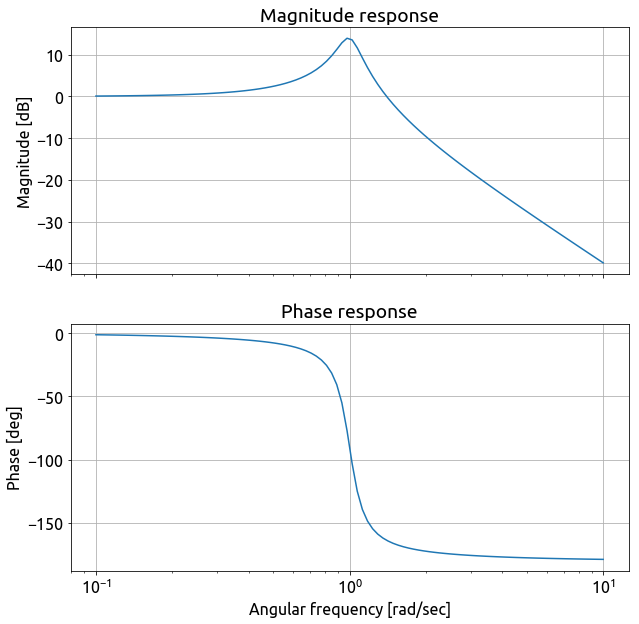

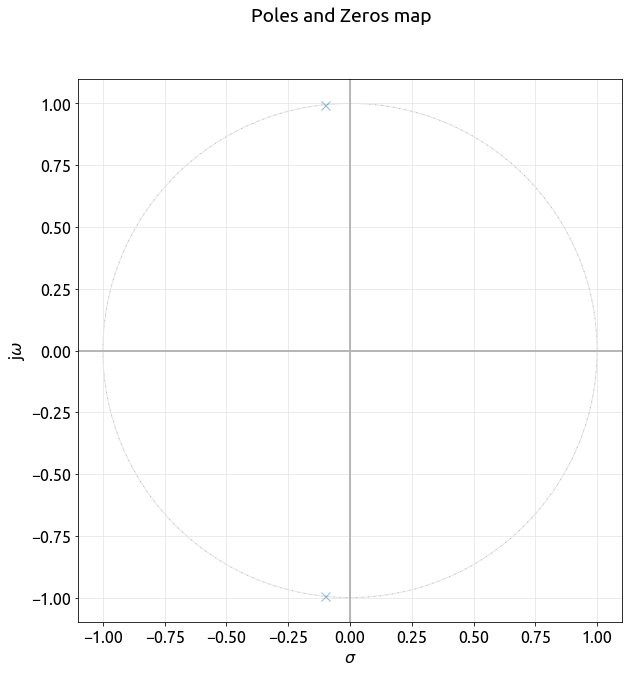

In [7]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los parámetros de la transferencia:

# O bien en términos de los parámetros w0 y Q

w0 = 1
Q = 5

# Cargamos la funcion transferencia

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

######################################################
# O podría ser en mediante los coeficientes del
# numerador y denominador

#num = np.array([ 1. ])
#den = np.array([ 1., 0.5, 1.0 ])

######################################################


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()


 c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.
  
 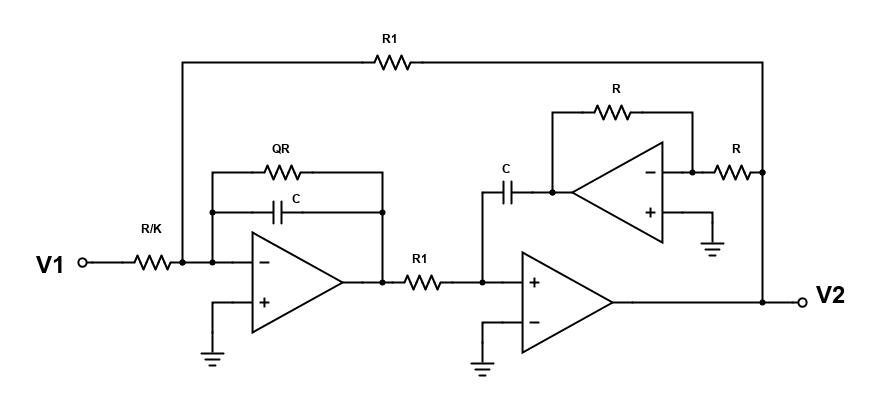

 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede encontrar un análisis pormenorizado de esta estructura en el libro de Schaumann.
</div>

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" /> Incluya capturas de:
<ul>
<li>la red simulada</li>
<li>al menos 2 detalles de la respuesta de módulo donde contrasta mediante cursores el correcto desempeño del filtro</li>
</ul> 
</div>

# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio público tuyo de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online en mi github](https://nbviewer.jupyter.org/github/marianux/jupytest/blob/master/desafio_cheby.ipynb) y [proyectado con nbviewer](https://github.com/marianux/jupytest/blob/master/desafio_cheby.ipynb). Yo prefiero usar la última opción, pero para gustos los colores ;)